# Analiza zdrowia psychicznego użytkowników social mediów

dane są z strony : https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance

## Przygotowanie Danych

#### Wczytanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams["figure.autolayout"] = True
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Wczytanie danych

In [2]:
df = pd.read_csv('data/Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


Baza danych zawiera 10 kolumn, z czego jedna ('User_ID') jest dla nas zbędna.
Baza zawiera 500 recordów, nie posiada braków, a wszytskie wartość mają odpowiednie typy danych.

In [3]:
if 'User_ID' in df.columns:
    df = df.drop('User_ID', axis=1)

df.columns = ['Wiek', 'Płeć', 'Czas_przed_ekranem_dziennie', 'Jakość_snu', 'Poziom_stresu', 'Dni_bez_social_mediów', 'Ćwiczenia_tygodniowo', 'Platformy_social_mediów', 'Poziom_szczęścia']
df['Płeć'] = df['Płeć'].replace({'Male': 'Mężczyzna', 'Female': 'Kobieta', 'Other': 'inne'})

kolNumeryczne = df.select_dtypes(include=['float','int']).columns
kolNieNumeryczne = df.select_dtypes(include=['object']).columns

df.head()

,Wiek,Płeć,Czas_przed_ekranem_dziennie,Jakość_snu,Poziom_stresu,Dni_bez_social_mediów,Ćwiczenia_tygodniowo,Platformy_social_mediów,Poziom_szczęścia
0,44,Mężczyzna,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,30,inne,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,23,inne,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,36,Kobieta,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,34,Kobieta,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


#### walidacja bazy danych

In [5]:
duplikaty = df.duplicated()
duplikaty[duplikaty == True].sum()

np.int64(0)

In [6]:
df.isna().sum().sum()

np.int64(0)

Baza danych nie posiada duplikatów oraz jest wolna od NaN

## Podstawowa analiza

#### analiza danych numerycznych

In [7]:
df[kolNumeryczne].describe()

,Wiek,Czas_przed_ekranem_dziennie,Jakość_snu,Poziom_stresu,Dni_bez_social_mediów,Ćwiczenia_tygodniowo,Poziom_szczęścia
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


#### analiza danych nienumerycznych

In [8]:
for kol in kolNieNumeryczne:
    print(df[kol].value_counts(), end='\n\n\n')

Płeć
Mężczyzna    248
Kobieta      229
inne          23
Name: count, dtype: int64


Platformy_social_mediów
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64




Ilość kobiet jest zbliżona do ilości mężczyzn oraz ilość użytkowników poszczególnych platform jest do siebie zbliżona, mamy zatem doczynienia z dobrze zbalansowaną bazą danych.

## Wizualizacja pojedyńczych statystyk

#### Wiek

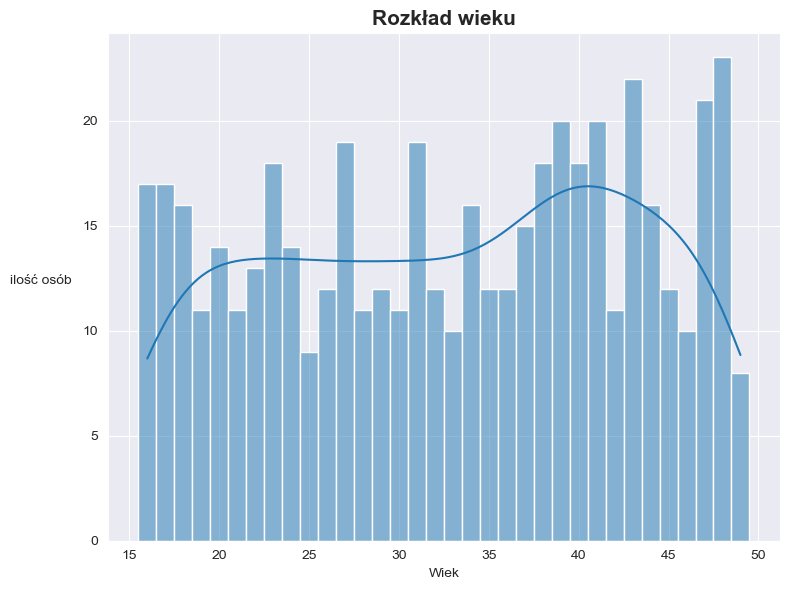

count    500.000000
mean      32.988000
std        9.960637
min       16.000000
25%       24.000000
50%       34.000000
75%       41.000000
max       49.000000
Name: Wiek, dtype: float64

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'Wiek', binwidth=1, kde=True, discrete=True)
plt.ylabel('ilość osób', rotation=0, labelpad=30)
plt.title('Rozkład wieku', fontsize=15, fontweight='bold')

plt.show()
df['Wiek'].describe()

#### Płeć

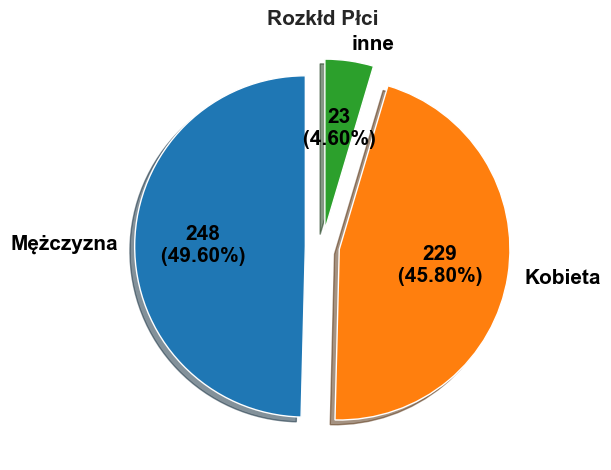

In [10]:
genderC = df['Płeć'].value_counts()
plt.pie(
    genderC,
    labels=genderC.index,
    autopct=lambda p: '{:,.0f}\n ({:.2f}%) '.format(p * sum(genderC)/100, p),
    startangle=90,
    explode=(0.1,0.1,0.1),
    textprops={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'},
    shadow=True
)

plt.title('Rozkłd Płci', fontsize=15, fontweight='bold')
plt.show()


#### Czas przed ekranem dziennie

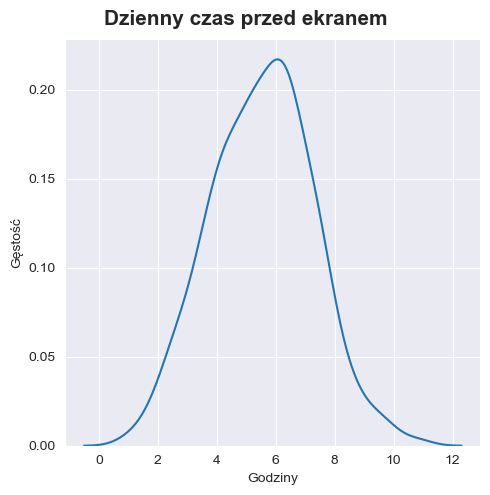

count    500.000000
mean       5.530000
std        1.734877
min        1.000000
25%        4.300000
50%        5.600000
75%        6.700000
max       10.800000
Name: Czas_przed_ekranem_dziennie, dtype: float64

In [11]:
#Wykres gestosci, poniewaz zmienne ciagłe, a nie dyskretne
w = sns.displot(x='Czas_przed_ekranem_dziennie', data=df, kind='kde')  #sns.displot tworzy własny faceGrid
w.set_axis_labels("Godziny", "Gęstość")
w.fig.subplots_adjust(top=0.92)
_ = w.fig.suptitle("Dzienny czas przed ekranem", fontsize=15, fontweight='bold')

plt.show()
df['Czas_przed_ekranem_dziennie'].describe()

#### Jakość snu (1-10)

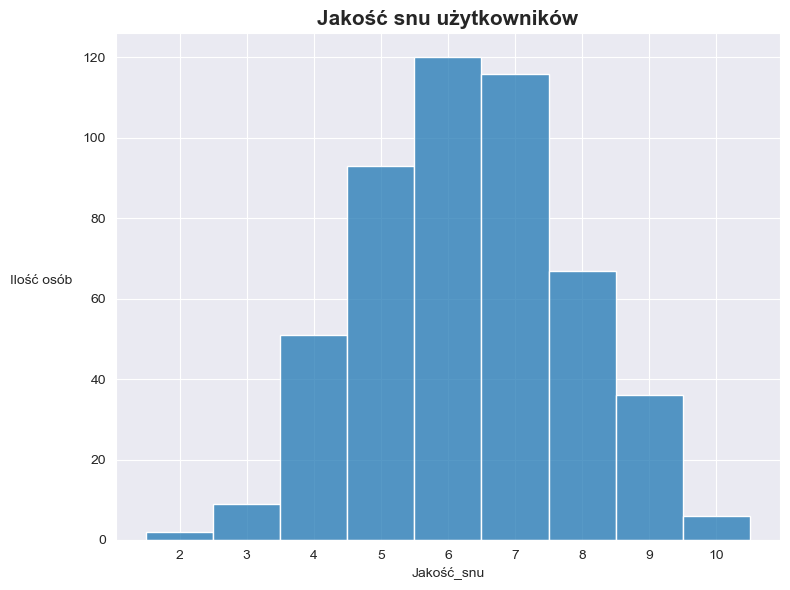

count    500.000000
mean       6.304000
std        1.529792
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: Jakość_snu, dtype: float64

In [12]:
plt.figure(figsize=(8,6))
w = sns.histplot(x='Jakość_snu', data=df, binwidth=1, discrete=True)
w.set_xlabel('Jakość_snu')
w.set_ylabel('Ilość osób', rotation=0, labelpad=30)
w.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #Aby liczby na osi X były całkowite
w.set_title("Jakość snu użytkowników", fontsize=15, fontweight='bold')

plt.show()
df['Jakość_snu'].describe()

#### Poziom stresu (1-10)

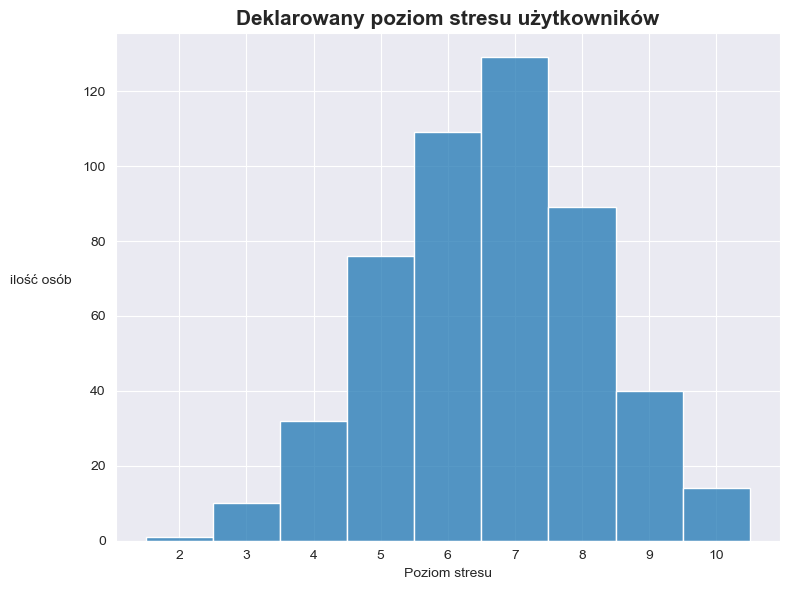

count    500.000000
mean       6.618000
std        1.542996
min        2.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Poziom_stresu, dtype: float64

In [13]:
plt.figure(figsize=(8,6))
s = sns.histplot(x='Poziom_stresu', data=df, binwidth=1, discrete=True)
s.set_xlabel('Poziom stresu')
s.set_ylabel('ilość osób', rotation=0, labelpad=30)
s.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
s.set_title("Deklarowany poziom stresu użytkowników", fontsize=15, fontweight='bold')

plt.show()
df['Poziom_stresu'].describe()

#### Dni bez social mediów

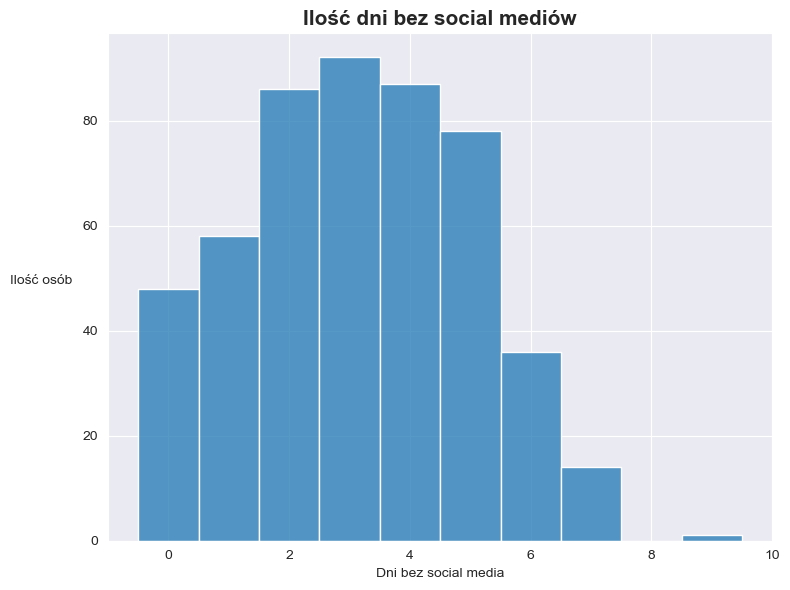

count    500.000000
mean       3.134000
std        1.858751
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        9.000000
Name: Dni_bez_social_mediów, dtype: float64

In [14]:
plt.figure(figsize=(8,6))
d = sns.histplot(x='Dni_bez_social_mediów', data=df, binwidth=1, discrete=True)
d.set_xlabel('Dni bez social media')
d.set_ylabel('Ilość osób', rotation=0, labelpad=30)
d.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
d.set_title("Ilość dni bez social mediów", fontsize=15, fontweight='bold')

plt.show()
df['Dni_bez_social_mediów'].describe()

#### Aktywność fizyczna (tygodniowa)

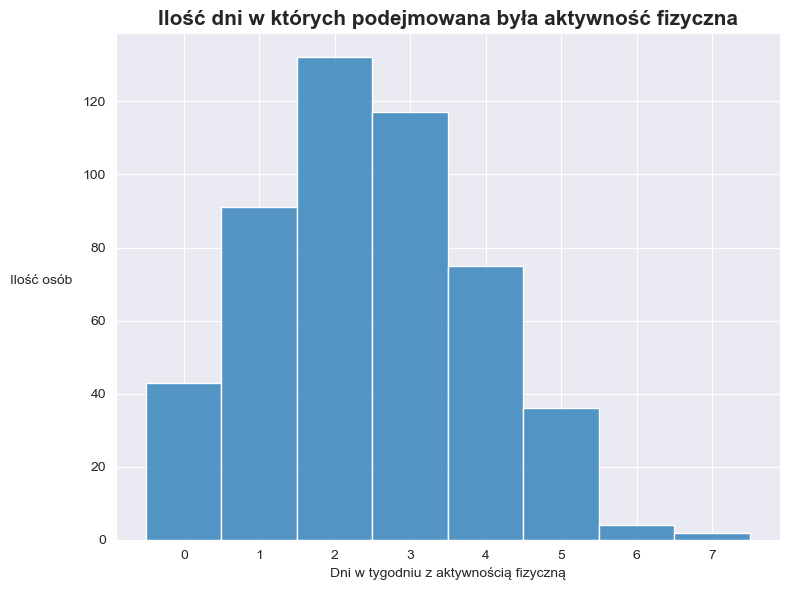

count    500.000000
mean       2.448000
std        1.428067
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Ćwiczenia_tygodniowo, dtype: float64

In [15]:
plt.figure(figsize=(8,6))
c = sns.histplot(x='Ćwiczenia_tygodniowo', data=df, binwidth=1, discrete=True)
c.set_xlabel('Dni w tygodniu z aktywnością fizyczną')
c.set_ylabel('Ilość osób', rotation=0, labelpad=30)
c.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
c.set_title("Ilość dni w których podejmowana była aktywność fizyczna", fontsize=15, fontweight='bold')
plt.tight_layout()

plt.show()
df['Ćwiczenia_tygodniowo'].describe()

#### Platforma Social Mediów

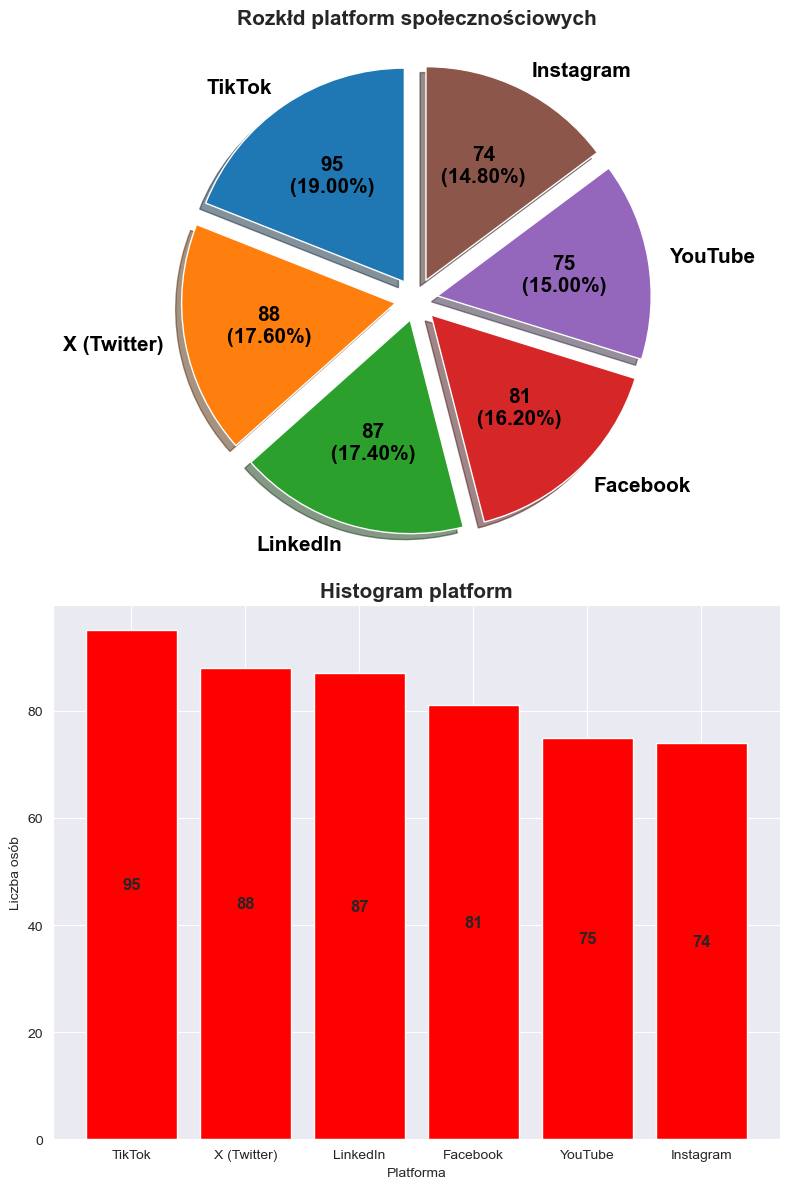

In [16]:
platformC = df['Platformy_social_mediów'].value_counts()

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.pie(
    platformC,
    labels=platformC.index,
    autopct=lambda p: '{:,.0f}\n ({:.2f}%) '.format(p * sum(genderC)/100, p),
    startangle=90,
    explode=[0.1]*len(platformC),
    textprops={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'},
    shadow=True
)
plt.title('Rozkłd platform społecznościowych', fontsize=15, fontweight='bold')

plt.subplot(2,1,2)
plt.bar(platformC.index, platformC.values, color='red')
plt.xlabel('Platforma')
plt.ylabel('Liczba osób')
plt.title('Histogram platform', fontsize=15, fontweight='bold')
for i, val in enumerate(platformC.values):
    plt.text(i, val/2, str(val), ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Deklarowany poziom szczęścia


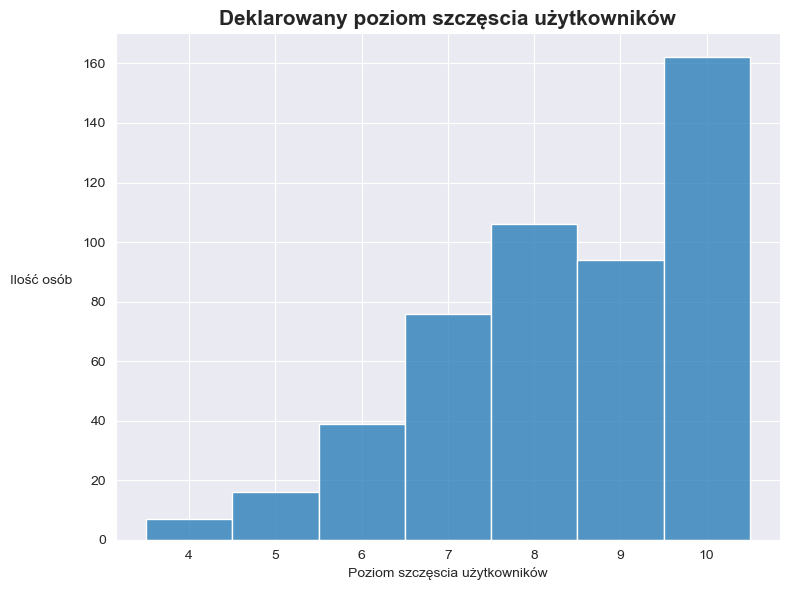

count    500.000000
mean       8.376000
std        1.524228
min        4.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: Poziom_szczęścia, dtype: float64

In [17]:
plt.figure(figsize=(8,6))
h = sns.histplot(x='Poziom_szczęścia', data=df, binwidth=1, discrete=True )
h.set_xlabel('Poziom szczęscia użytkowników')
h.set_ylabel('Ilość osób',rotation=0, labelpad=30)
h.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
h.set_title("Deklarowany poziom szczęscia użytkowników", fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()
df['Poziom_szczęścia'].describe()


## Badanie relacji i związków między danymi

#### Macierz korelacji danych

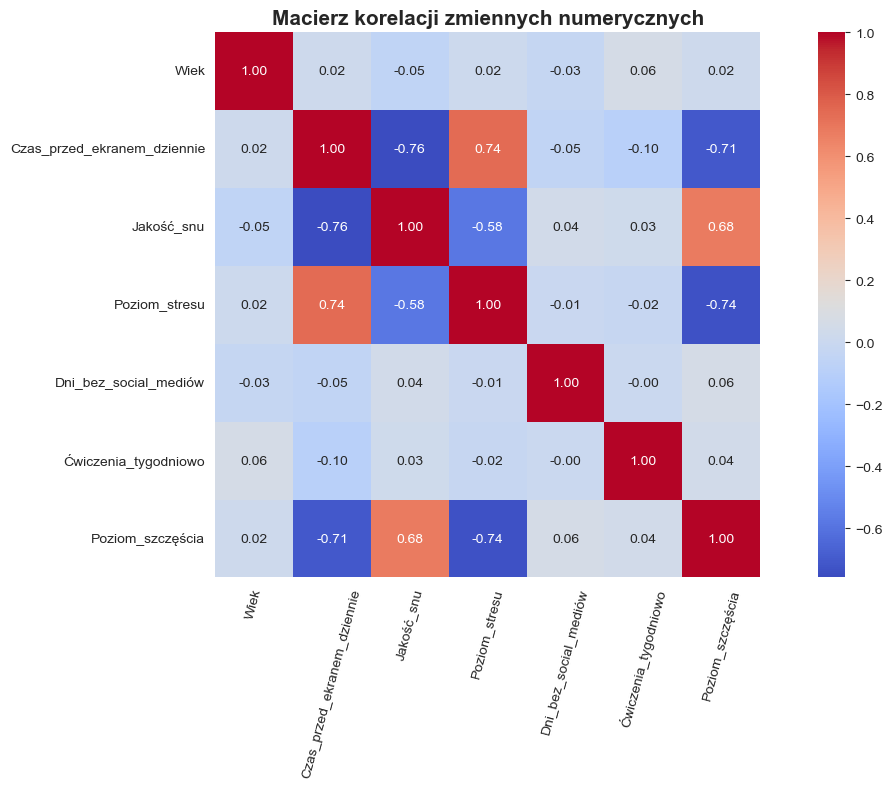

In [18]:
df_num = df[kolNumeryczne]
corr_matrix = df_num.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True)
plt.xticks(rotation=75)
plt.title("Macierz korelacji zmiennych numerycznych", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

##### Największa dodatnia korelacja, którą można zauważyć to związek między poziomem stresu i czasem spędzonym przed ekranem. Im więcej badani spędzali czasu przed ekranem tym ich poziom stresu wzrastał.

##### Największa korelacja ujemna natomiast występuje między jakością snu i czasem spędzonym przed ekranem, czyli im więcej czasu badani spędzali przed ekranami tym ich późniejsza jakość snu była subiektywnie gorsza.

##### Jeśli chodzi natomiast o poziom szczęscia to możemy zauważyć, że najwyższy jego poziom wykazywały osoby z dobrą jakością snu, niskim poziomem stresu i osoby które spędzały niewiele czasu przed ekranami. Przy czym największy wpływ na poziom szczęscia zdaje się mieć poziom stresu

##### Co ciekawe wiek, dni bez social mediów oraz aktywność fizyczna wykazują prawie zerową korelacje z poziomem szczęścia

### Użytkownicy poszczególnych serwisów społecznościowych w zróżnicowaniu na grupy wiekowe

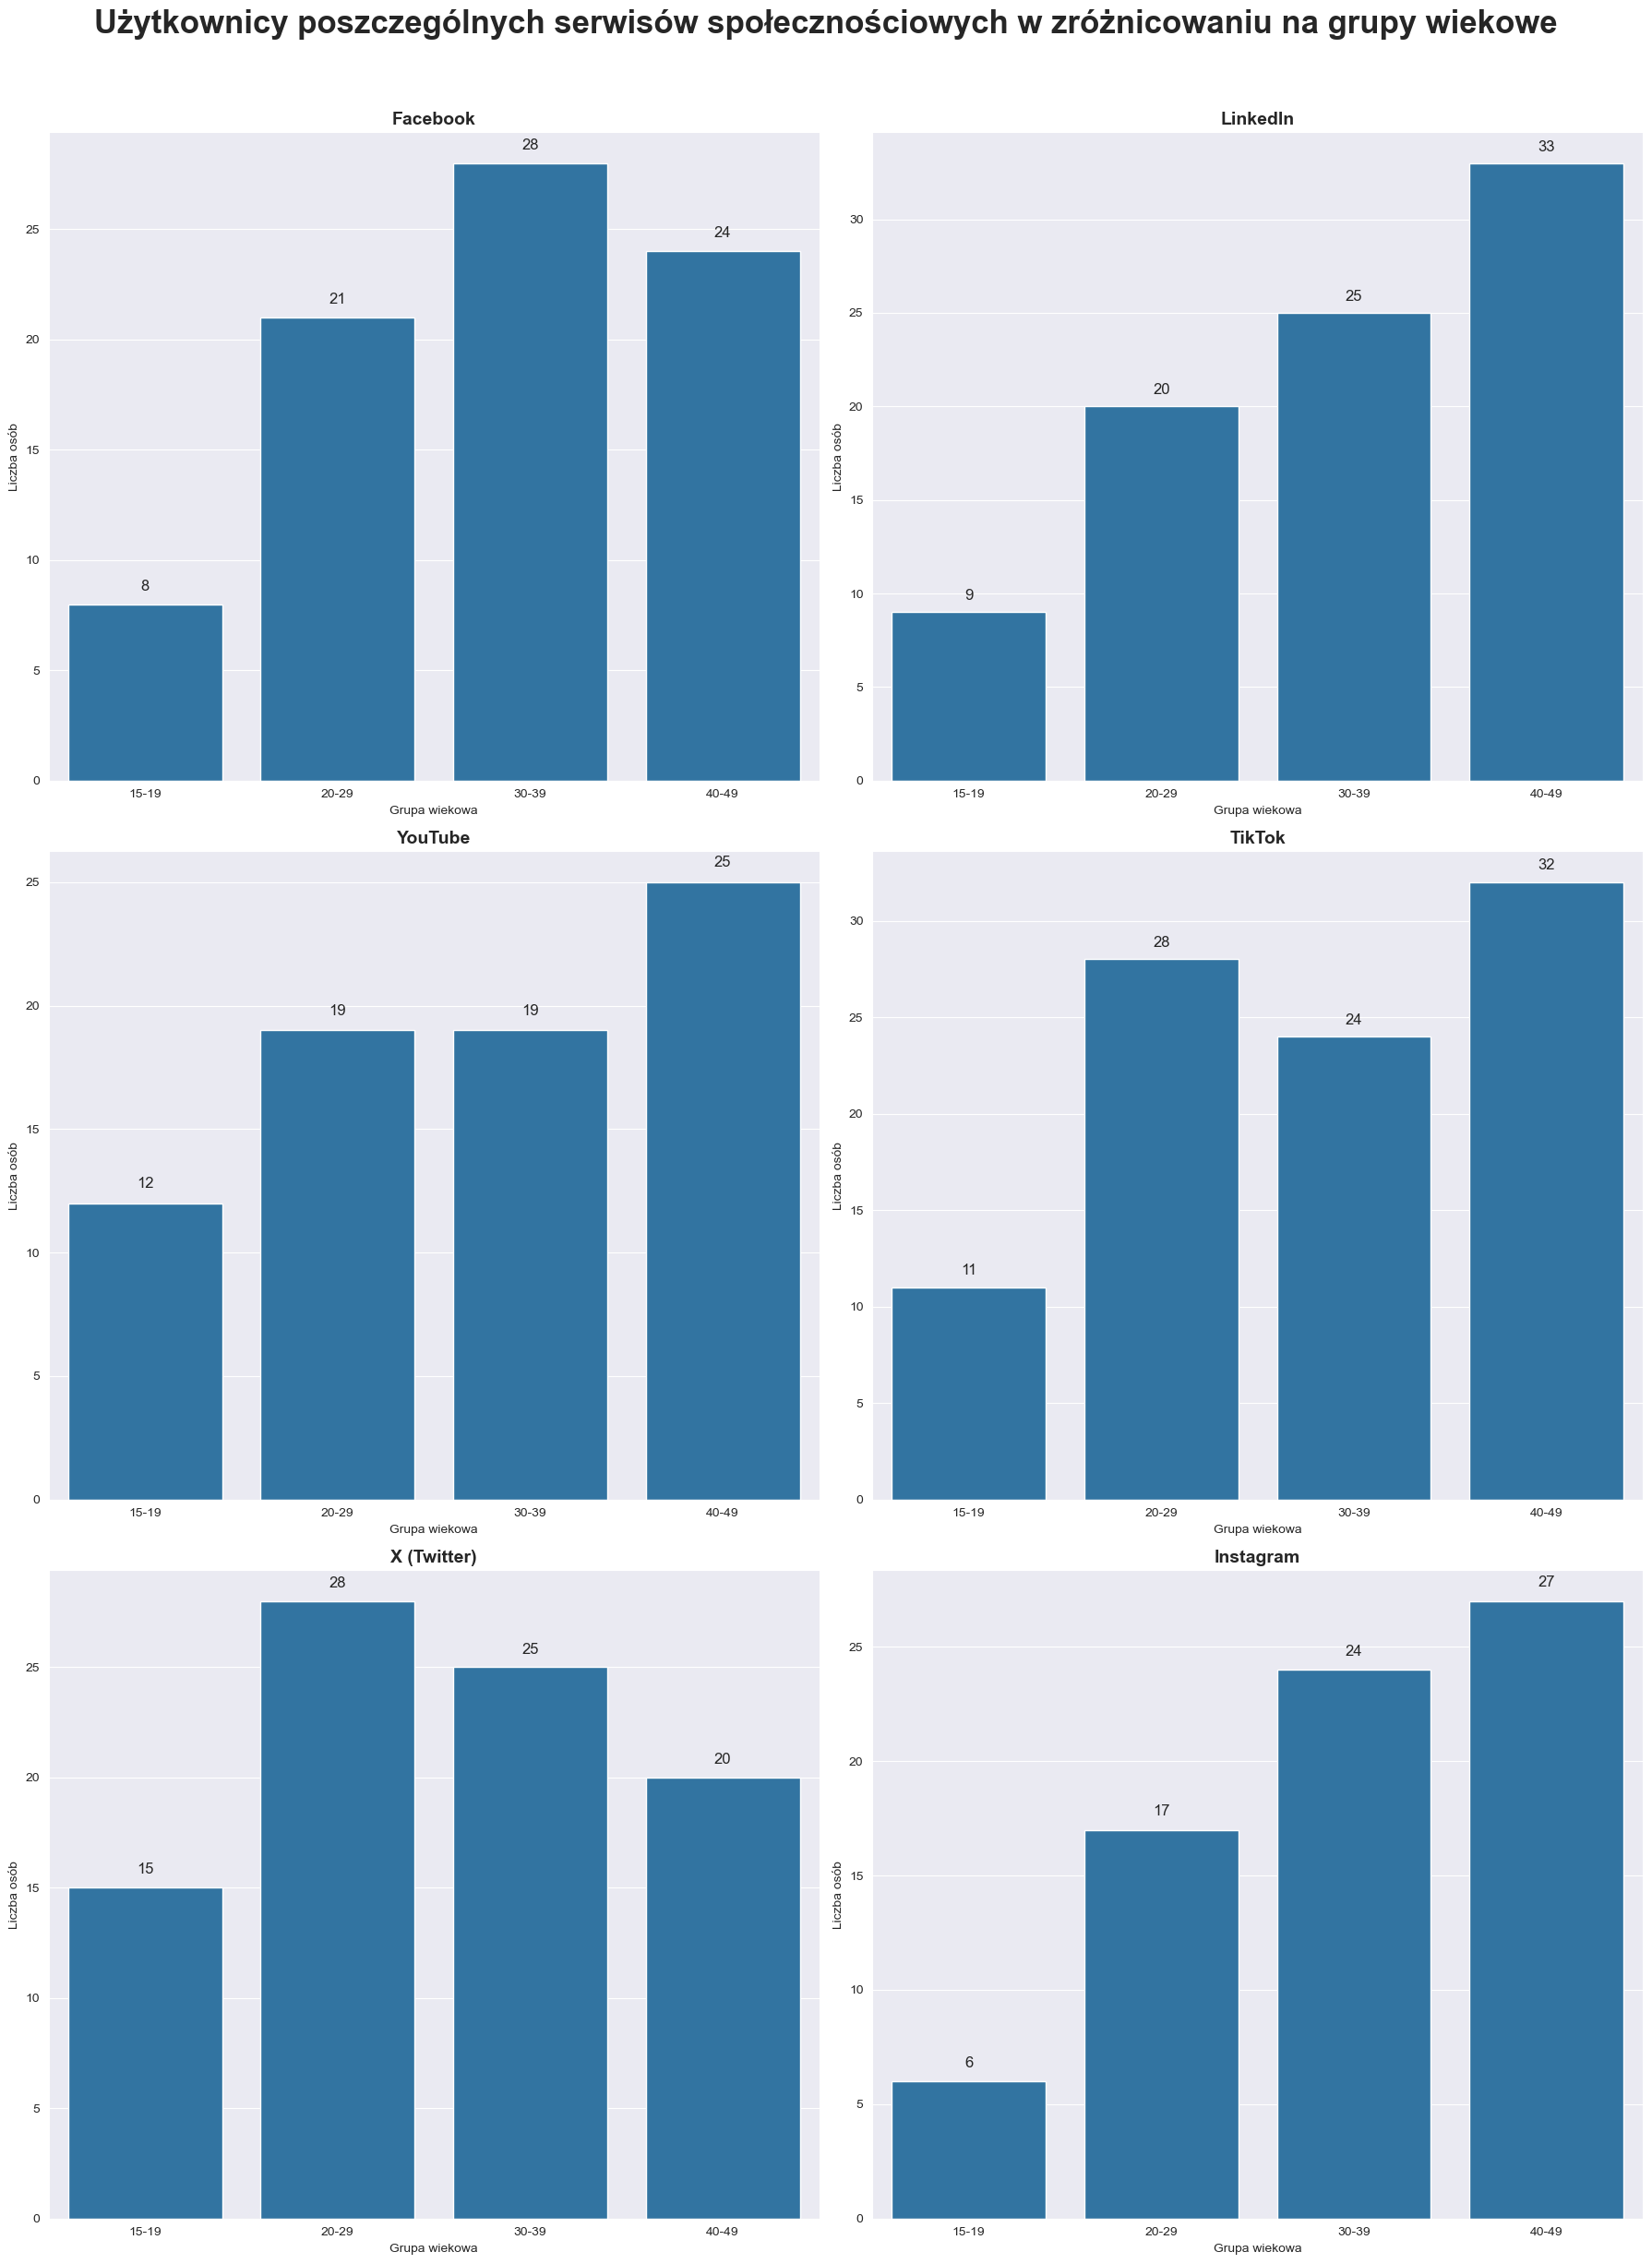

In [19]:
bins = [14, 19, 29, 39, 49]
labels = ['15-19', '20-29', '30-39', '40-49']

df_age_platform = pd.DataFrame({
    'Platforma': df['Platformy_social_mediów'],
    'Grupa_wiekowa': pd.cut(df['Wiek'], bins=bins, labels=labels, right=True)
})

platformy = df_age_platform['Platforma'].unique()


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,24))
fig.suptitle("Użytkownicy poszczególnych serwisów społecznościowych w zróżnicowaniu na grupy wiekowe", fontsize=25, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, platforma in enumerate(platformy):
    ax = axes[i]
    df_plat = df_age_platform[df_age_platform['Platforma'] == platforma]
    counts = df_plat['Grupa_wiekowa'].value_counts().sort_index()

    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(platforma, fontsize=14, fontweight='bold')
    ax.set_xlabel('Grupa wiekowa')
    ax.set_ylabel('Liczba osób')

    # liczby na słupkach
    for j, val in enumerate(counts.values):
        ax.text(j, val + 0.5, str(val), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Zróżnicowanie użytkowników platform ze względu na płeć

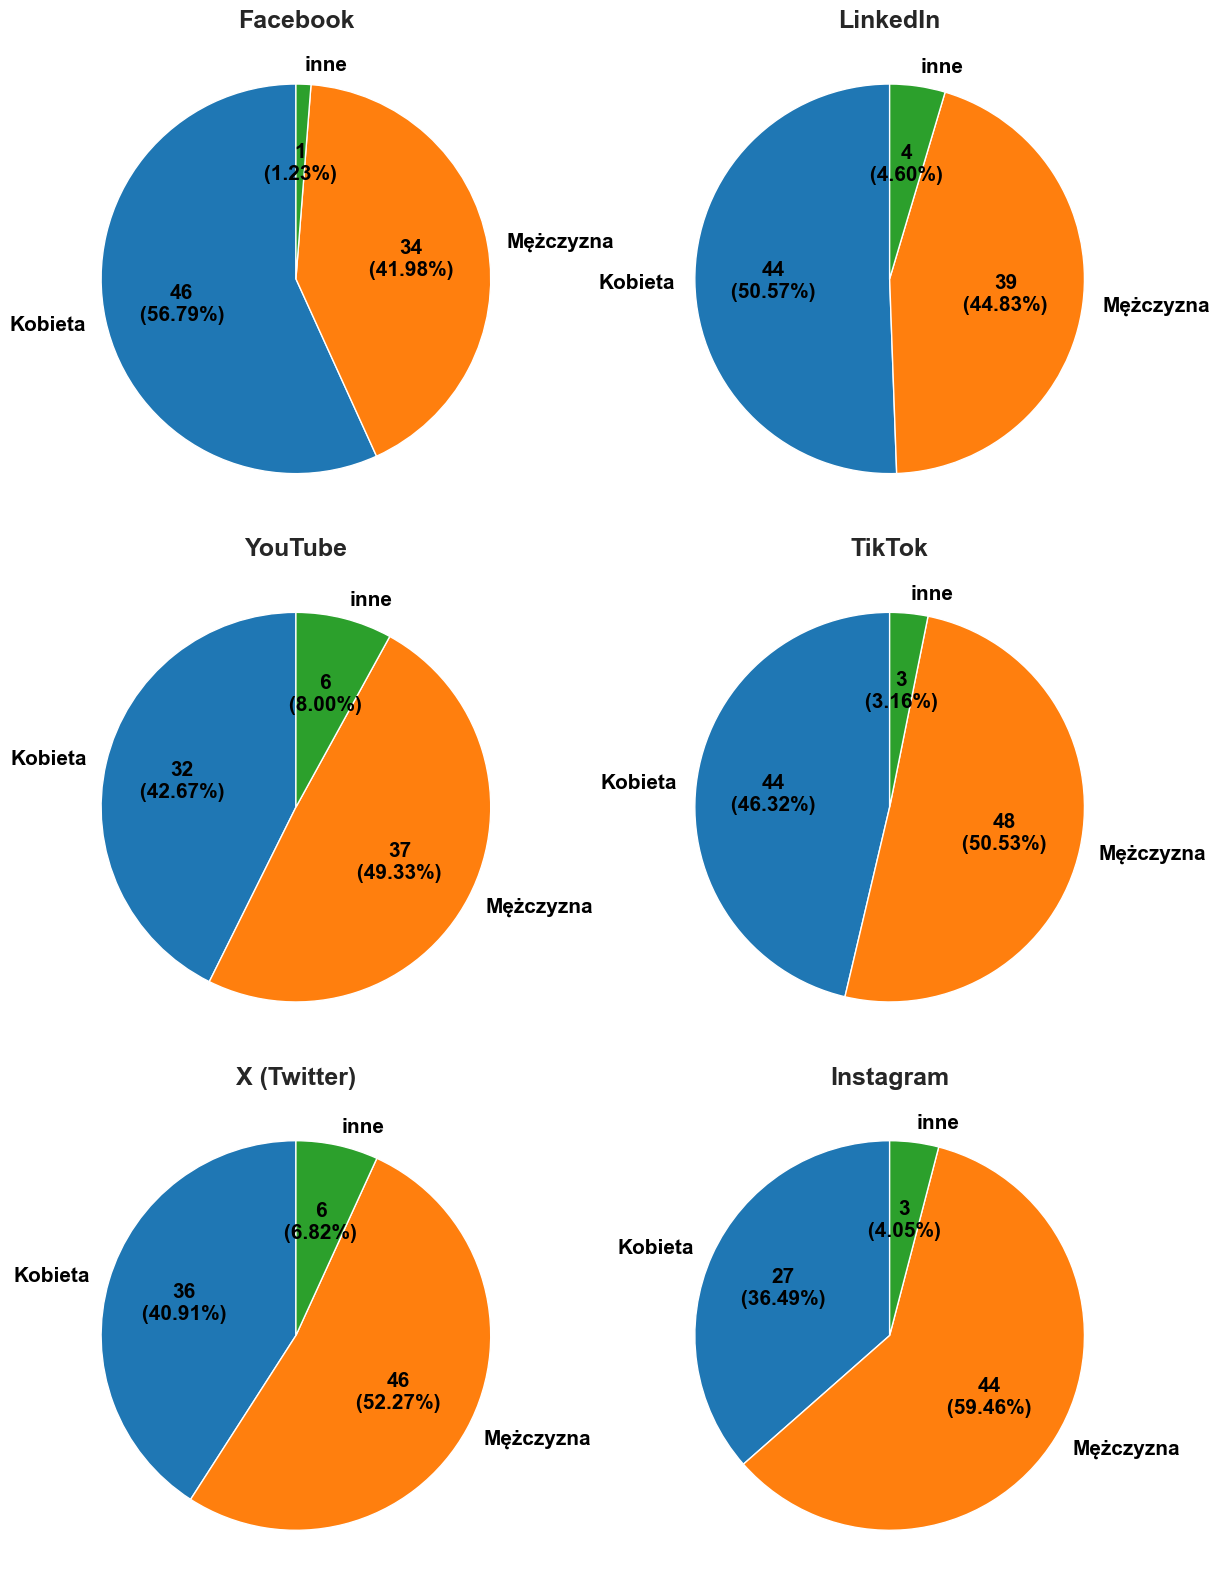

In [20]:
gender_platform = df.groupby(['Platformy_social_mediów', 'Płeć']).size()
platforms = df['Platformy_social_mediów'].unique()

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

for i, platform in enumerate(platforms):
    ax = axes[i]
    counts = gender_platform[platform]
    labels = counts.index
    values = counts.values

    ax.pie(
        values,
        labels=labels,
        autopct=lambda p: '{:,.0f}\n ({:.2f}%) '.format(p * sum(values)/100, p),
        textprops={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'},
        startangle=90
    )
    ax.set_title(platform, fontsize=18, fontweight='bold')


plt.tight_layout()
plt.show()


# Średni poziom stresu w różnych grupach wiekowych

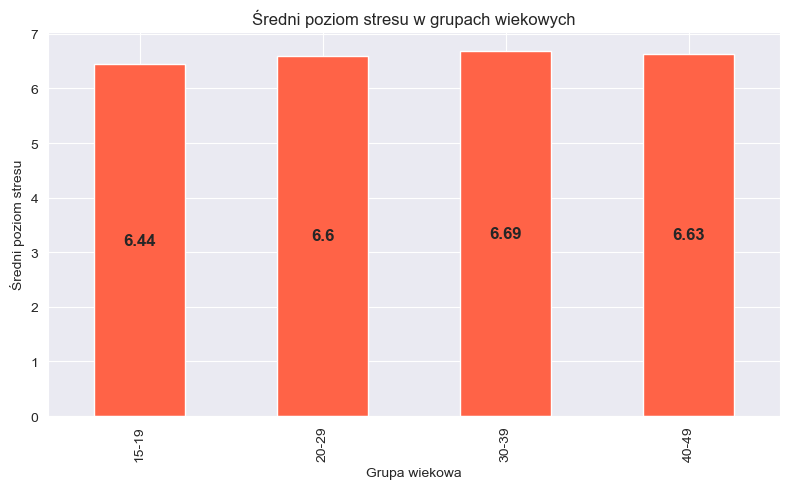

In [7]:
ages = df['Wiek']

bins = [14, 19, 29, 39, 49]
labels = ['15-19','20-29','30-39','40-49']
df['_grupa_wiekowa'] = pd.cut(ages, bins=bins, labels=labels)

agg = df.groupby('_grupa_wiekowa', observed=True)['Poziom_stresu'].mean()

plt.figure(figsize=(8,5))
agg.plot(kind='bar', color='tomato')
plt.title("Średni poziom stresu w grupach wiekowych")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Średni poziom stresu")
for i, val in enumerate(agg.values):
    plt.text(i, val/2, str(round(val,2)), ha='center', va='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


#### Można zauważyć że stres rośnie z wiekiem do 40 roku życia

# Średni poziom szczęścia w zależności od płci

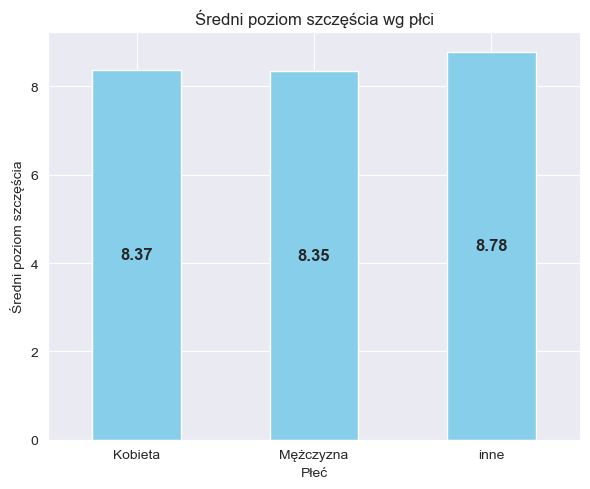

In [30]:
agg = df.groupby('Płeć')['Poziom_szczęścia'].mean()

plt.figure(figsize=(6,5))
agg.plot(kind='bar', color='skyblue')
plt.title("Średni poziom szczęścia wg płci")
plt.xlabel("Płeć",rotation=0)
plt.xticks(rotation=0)
plt.ylabel("Średni poziom szczęścia")
for i, val in enumerate(agg.values):
    plt.text(i, val/2, str(round(val,2)), ha='center', va='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


#### Poziom szczęscia nieszczególnie zależy od płci

# Różnice w stresie między użytkownikami intensywnymi a umiarkowanymi (na podstawie czasu przed ekranem)

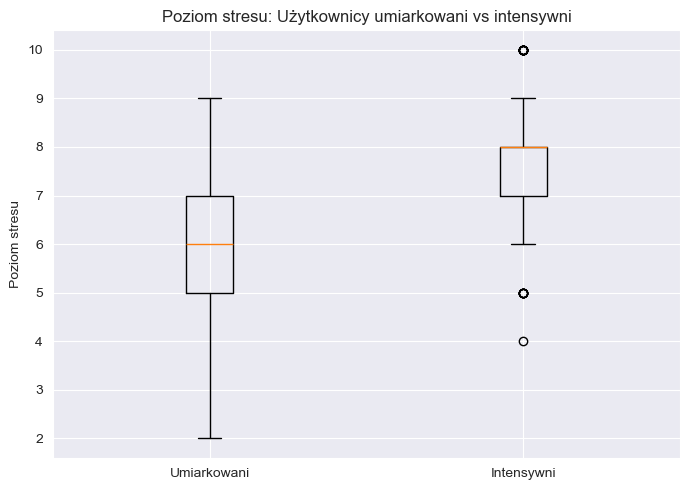

Test t: t = -17.976, p = 0.0000


In [31]:
# Użytkownicy intensywni: Czas_przed_ekranem_dziennie > mediana, umiarkowani <= mediana
mediana = df['Czas_przed_ekranem_dziennie'].median()
df['Grupa_użytkownika'] = df['Czas_przed_ekranem_dziennie'].apply(lambda x: 'Intensywni' if x > mediana else 'Umiarkowani')

grupy = df.groupby('Grupa_użytkownika')['Poziom_stresu']

data = [grupy.get_group(g).dropna() for g in ['Umiarkowani', 'Intensywni']]

plt.figure(figsize=(7,5))
plt.boxplot(data, labels=['Umiarkowani', 'Intensywni'])
plt.title('Poziom stresu: Użytkownicy umiarkowani vs intensywni')
plt.ylabel('Poziom stresu')
plt.tight_layout()
plt.show()

# Test t dla różnicy średnich
t_stat, p_val = stats.ttest_ind(data[0], data[1], equal_var=False)
print(f"Test t: t = {t_stat:.3f}, p = {p_val:.4f}")


#### Użytkownicy intensywni wykazują wyższy poziom stresu

# Jakość snu na różnych poziomach aktywności w social media (na podstawie czasu przed ekranem)

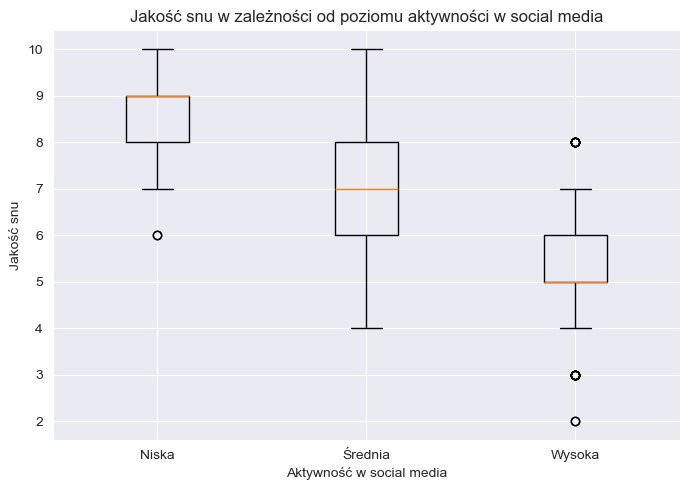

In [8]:
# Grupujemy na niską, średnią i wysoką aktywność wg czasu przed ekranem
med = df['Czas_przed_ekranem_dziennie'].median()
low_thresh = med / 2

def grupa_aktywnosci(x):
    if x <= low_thresh:
        return 'Niska'
    elif x <= med:
        return 'Średnia'
    else:
        return 'Wysoka'

df['Aktywnosc_SM'] = df['Czas_przed_ekranem_dziennie'].apply(grupa_aktywnosci)

groups = df.groupby('Aktywnosc_SM')['Jakość_snu']

data = [groups.get_group(g).dropna() for g in ['Niska', 'Średnia', 'Wysoka']]

plt.figure(figsize=(7,5))
plt.boxplot(data, labels=['Niska', 'Średnia', 'Wysoka'])
plt.title('Jakość snu w zależności od poziomu aktywności w social media')
plt.ylabel('Jakość snu')
plt.xlabel("Aktywność w social media")
plt.tight_layout()
plt.show()


#### Można zaobserwować jak jakość snu spada gdy więcej czasu spędza się w social mediach

## Poziom szczęścia w zależności od czasu przed ekranem

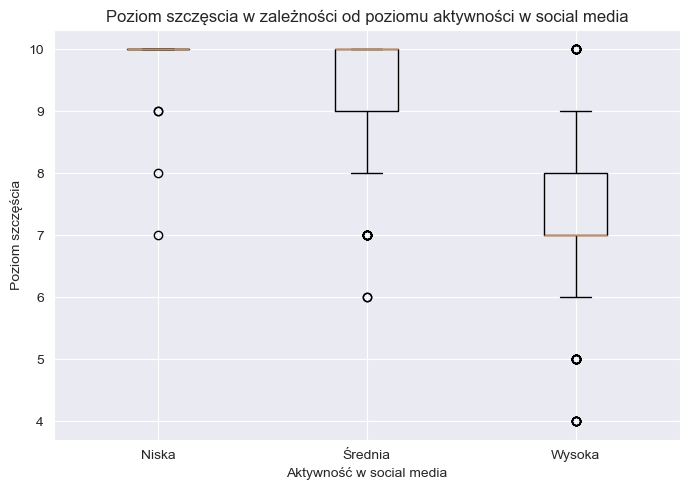

In [9]:
groups = df.groupby('Aktywnosc_SM')['Poziom_szczęścia']

data = [groups.get_group(g).dropna() for g in ['Niska', 'Średnia', 'Wysoka']]

plt.figure(figsize=(7,5))
plt.boxplot(data, labels=['Niska', 'Średnia', 'Wysoka'])
plt.title('Poziom szczęscia w zależności od poziomu aktywności w social media')
plt.ylabel('Poziom szczęścia')
plt.xlabel("Aktywność w social media")
plt.tight_layout()
plt.show()

#### Użytkownicy, którzy więcej czasu spędzają w social mediach wykazują niższy poziom szczęscia